<a href="https://colab.research.google.com/github/Yashwardhankaul/uber_case_study/blob/master/uber_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UBER REQUEST DATASET CASE STUDY

# Business Objectives

The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation. As a result of your analysis, you should be able to present to the client the root cause(s) and possible hypotheses of the problem(s) and recommend ways to improve them.  

### Data Understanding

There are six attributes associated with each request made by a customer:

1. Request id: A unique identifier of the request
2. Time of request: The date and time at which the customer made the trip request
3. Drop-off time: The drop-off date and time, in case the trip was completed 
4. Pick-up point: The point from which the request was made
5. Driver id: The unique identification number of the driver
6. Status of the request: The final status of the trip, that can be either completed, cancelled by the driver or no cars available

#### Note: For this assignment, only the trips to and from the airport are being considered.

Data Cleaning and Preparation - Hints

1. Identify the data quality issues and clean the data so that you can use it for analysis.
2. Ensure that the dates and time are in the proper format. Derive new variables which will be useful for analysis.

### Results Expected

1. Visually identify the most pressing problems for Uber. 
#### Hint: Create plots to visualise the frequency of requests that get cancelled or show 'no cars available'; identify the most problematic types of requests (city to airport / airport to city etc.) and the time slots (early mornings, late evenings etc.) using plots
2. Find out the gap between supply and demand and show the same using plots.
3. Find the time slots when the highest gap exists.
4. Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots.
5. What do you think is the reason for this issue for the supply-demand gap? Write the answer in less than 100 words. You may accompany the write-up with plot(s).
6.Recommend some ways to resolve the supply-demand gap.

In [0]:
#Importing Google Drive to access Dataset
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Checking if the files are available
!ls "drive/My Drive"

In [0]:
#Importing dependencies 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
%matplotlib inline

In [0]:
#Reading the .CSV file and storing it as a pandas dataframe
df = pd.read_csv("drive/My Drive/Uber Request Data.csv")

In [0]:
#Take a look at some of the data
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [0]:
#Looking for the data types inside the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [0]:
cabs_vs_demand = pd.DataFrame({'Total No. of Drivers':[df['Driver id'].nunique()], 
                                 'Total Demand Per Day':[df['Request id'].nunique()/5],
                                'Trips Completed Per Day':df[(df['Status']=='Trip Completed')].shape[0]/5})
cabs_vs_demand

,Total Demand Per Day,Total No. of Drivers,Trips Completed Per Day
0,1349.0,300,566.2


In [0]:
# Average requests per driver
cabs_vs_demand['Total Demand Per Day']/cabs_vs_demand['Total No. of Drivers']

0    4.496667
dtype: float64

## Cleaning DataFrame

In [0]:
# Formatting request timestamp and drop timestamp columns
df["Request timestamp"] = pd.to_datetime(df["Request timestamp"], dayfirst=True)
df["Drop timestamp"] = pd.to_datetime(df["Drop timestamp"], dayfirst=True)

In [0]:
#Let's take a look at the dataframe again
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [0]:
#Making the data easier to read by deriving metrics and adding new columns 
df['Request Date'] = df["Request timestamp"].dt.date
df['Request Time'] = df["Request timestamp"].dt.time
df['Drop Date'] = df["Drop timestamp"].dt.date
df['Drop Time'] = df["Drop timestamp"].dt.time
df['Request Weekday'] = df['Request timestamp'].apply(lambda x: dt.datetime.strftime(x, '%A'))
df['Request Hour'] = df['Request timestamp'].apply(lambda x: x.hour)

In [0]:
#Look at the dataframe again
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,2016-07-11,13:00:00,Monday,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,2016-07-11,18:47:00,Monday,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,2016-07-12,09:58:00,Tuesday,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,2016-07-12,22:03:00,Tuesday,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,Wednesday,8


## Visualizations 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


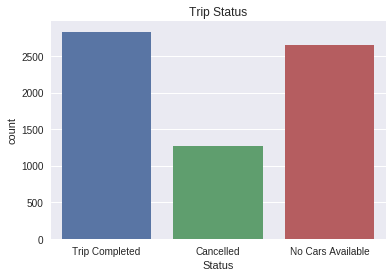

In [0]:
# plotting graph for trip status
plt.title('Trip Status')
sns.countplot(df['Status'])

We can clearly see from this plot that Uber is losing quite a lot of business due to shortage of available Cabs. The question that surfaces now is at what times during the day is the supply and demand gap most severe and if that is different for different days in the week.
By carefully targeting the pitfalls Uber can ensure future customer satisfaction and loyalty. 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


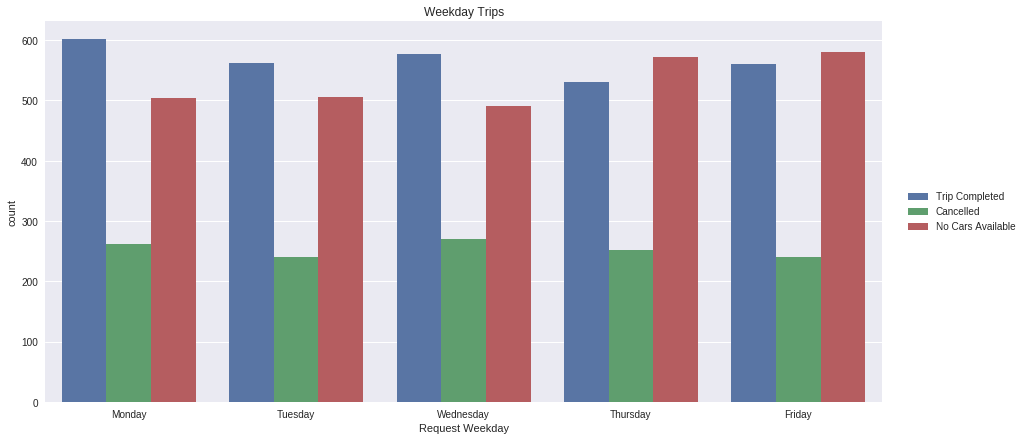

In [0]:
# plot data to show status count for each day
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Weekday Trips")
ax = sns.countplot(x='Request Weekday',hue='Status',data=df)
plt.legend(bbox_to_anchor=(1.17, 0.5), loc='right')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


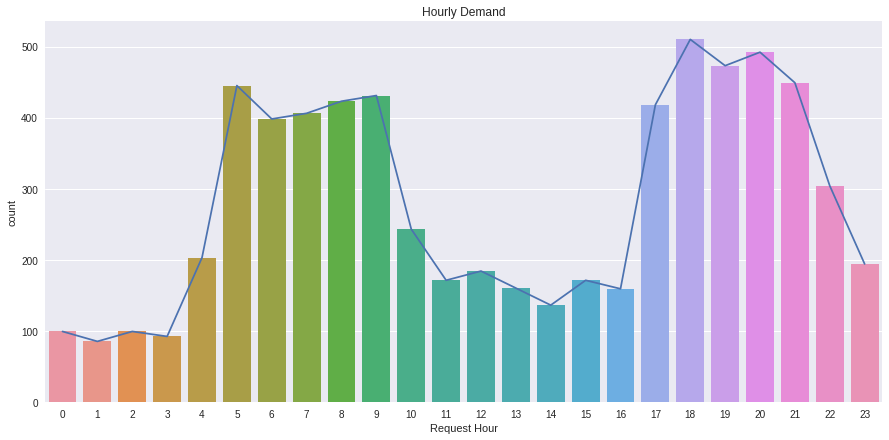

In [0]:
# plot data to show hourly distribution of request/demand
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Hourly Demand')
df.groupby(df['Request Hour']).count()['Request id'].plot(ax=ax)
sns.countplot(df['Request Hour'])

Looks like the peak hours for cab requests lie between 5AM to 9AM and between 5PM to 9PM. Let's see how it looks on a heatmap.

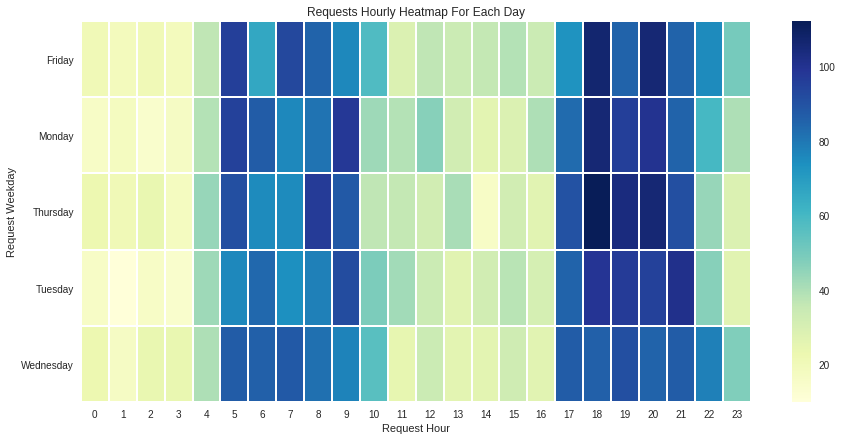

In [0]:
#Heatmap data for requests with weekdays and hours
heat_data_demand = df.groupby(['Request Weekday', 'Request Hour']).size().reset_index()
heat_data_demand.columns = ['Request Weekday', 'Request Hour', 'Hourly Count']
# plot data to show hourly request heatmap
fig, ax = plt.subplots(figsize=(15,7))

plt.title('Requests Hourly Heatmap For Each Day')
sns.heatmap(heat_data_demand.pivot('Request Weekday', 'Request Hour', 'Hourly Count'), linewidths=1, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.show()

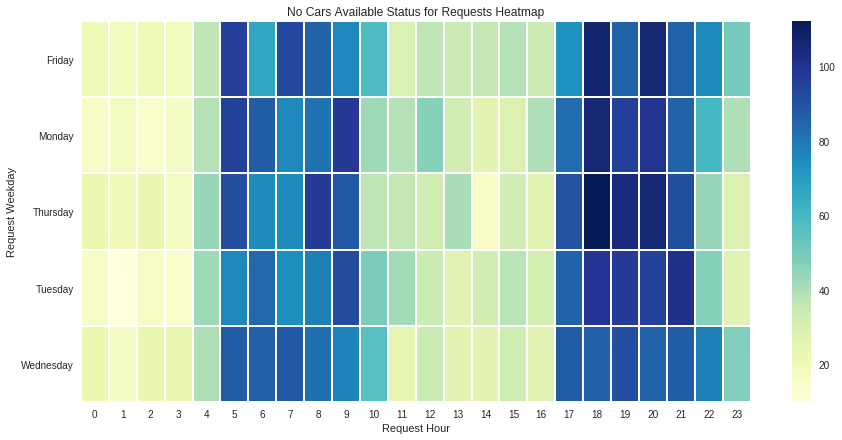

In [0]:
#Heatmap data for 'No cars Available' Status on weekdays and hours
no_cars_available = df[df["Driver id"].isnull()]
no_cars_available.head()
heat_data_no_cars = no_cars_available.groupby(['Request Weekday', 'Request Hour']).size().reset_index()
heat_data_no_cars.columns = ['Request Weekday', 'Request Hour', 'Hourly Count']
# plot data to show hourly No cars Available heatmap
fig, ax = plt.subplots(figsize=(15,7))

plt.title('No Cars Available Status for Requests Heatmap')
sns.heatmap(heat_data_demand.pivot('Request Weekday', 'Request Hour', 'Hourly Count'), linewidths=1, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.show()

Both of these Heatmaps tell the same story. 
Uber cannot keep up with the demand at the peak request hours. It will be a good idea now to see the location of the demand vs supply gap i.e. Airport or the City.

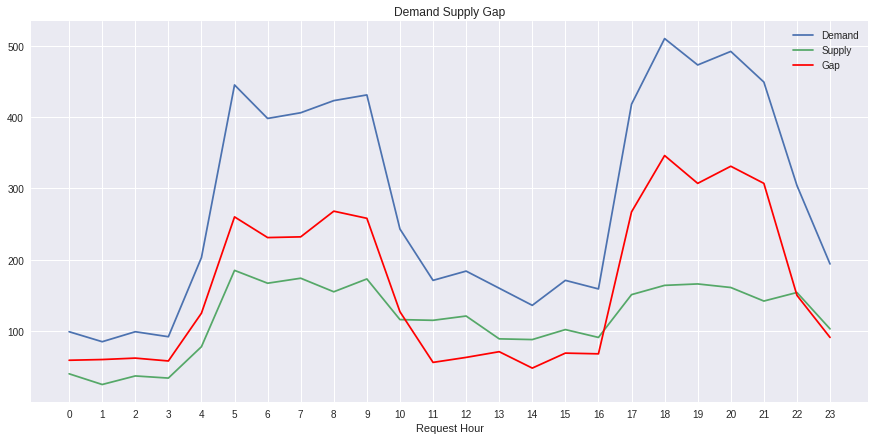

In [0]:
#plot data to show demand supply gap
fig, ax = plt.subplots(figsize=(15,7))
plt.xticks([i for i in range(0,24)])
df.groupby(df['Request Hour']).count()['Request id'].plot(ax=ax, label='Demand')
df[df['Status']=="Trip Completed"].groupby(df[df['Status']=="Trip Completed"]['Request Hour']).count()['Request id'].plot(ax=ax, label='Supply')
(df.groupby(df['Request Hour']).count()['Request id'] - df[df['Status']=="Trip Completed"].groupby(df[df['Status']=="Trip Completed"]['Request Hour']).count()['Request id']).plot(ax=ax, label='Gap', c='red')
plt.grid("on")
plt.title("Demand Supply Gap")
plt.legend()

This plot clearly visualizes the supply-demand problem that Uber is facing and the peak severity hours. Let's pin point the location of the severity in the next graph.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


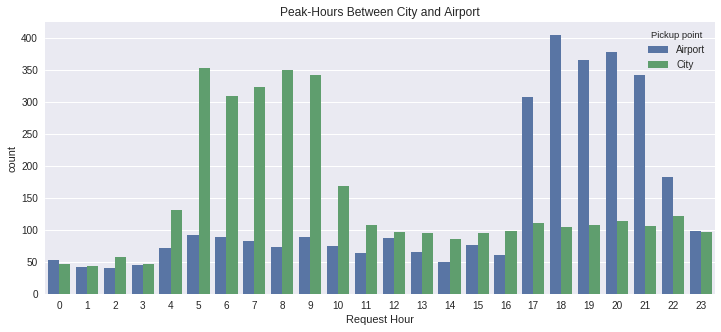

In [0]:
# plot hourly data to visualize peakhours from city to airport and airport to city trip
plt.subplots(figsize=(12,5))
plt.title("Peak-Hours Between City and Airport")
sns.countplot(x='Request Hour',hue='Pickup point',data=df)

We can see here that the demand in the City is at its peak between 5AM and 9AM and between 5PM and 9PM at the Airport. Demand in the City can probably be associated with the departuring flights and the demand at the airport can be associated with the density of incoming flights.

In [0]:
#creating two dataframes for City and Airport seperate analysis
city = df[df['Pickup point']=="City"]
airport = df[df['Pickup point']=="Airport"]

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


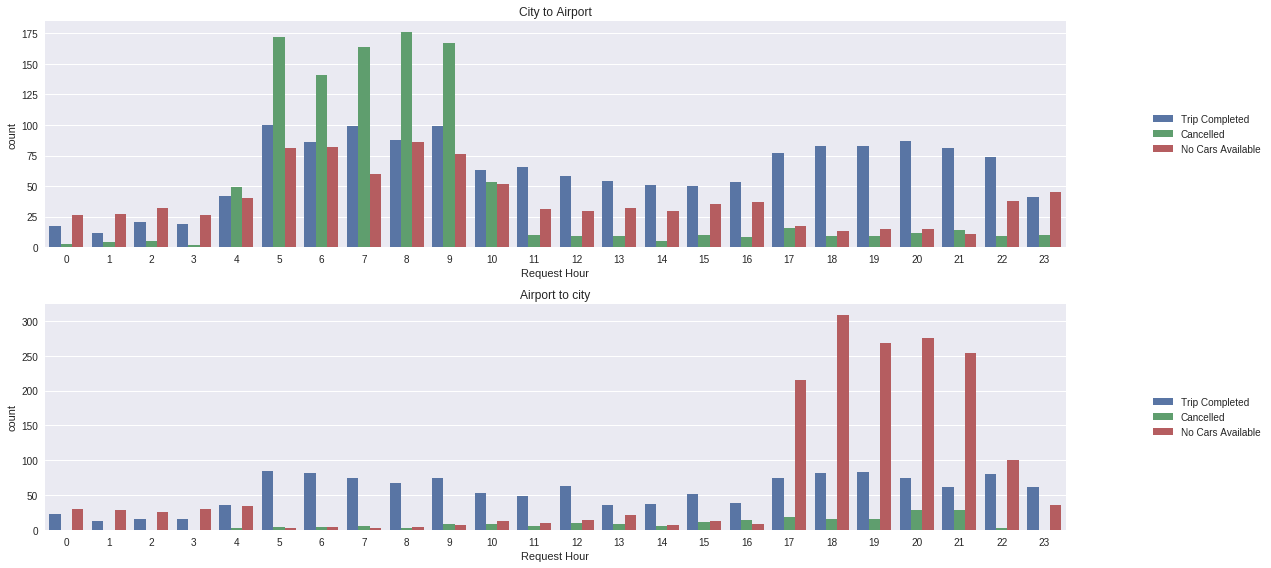

In [0]:
# plot data to get count of status for airport to city and city to airport trips
f = plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.title("City to Airport")
sns.countplot(x='Request Hour',hue='Status',data=city)
plt.legend(bbox_to_anchor=(1.20, 0.5), loc='right')
plt.subplot(2,1,2)
plt.title("Airport to city")
sns.countplot(x='Request Hour',hue='Status',data=airport)
plt.legend(bbox_to_anchor=(1.20, 0.5), loc='right')
plt.tight_layout()

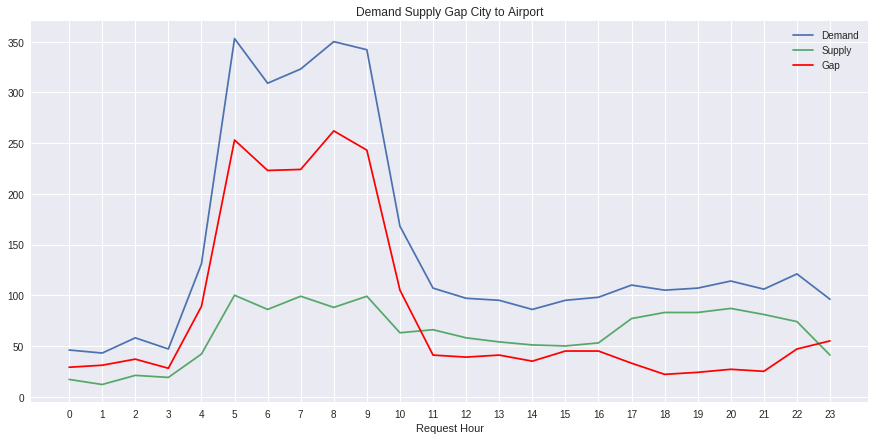

In [0]:
#plot data to show demand supply gap City to Airport
fig, ax = plt.subplots(figsize=(15,7))
plt.xticks([i for i in range(0,24)])
city.groupby(city['Request Hour']).count()['Request id'].plot(ax=ax, label='Demand')
city[city['Status']=="Trip Completed"].groupby(city[city['Status']=="Trip Completed"]['Request Hour']).count()['Request id'].plot(ax=ax, label='Supply')
(city.groupby(city['Request Hour']).count()['Request id'] - city[city['Status']=="Trip Completed"].groupby(city[city['Status']=="Trip Completed"]['Request Hour']).count()['Request id']).plot(ax=ax, label='Gap', c='red')
plt.grid("on")
plt.title("Demand Supply Gap City to Airport")
plt.legend()

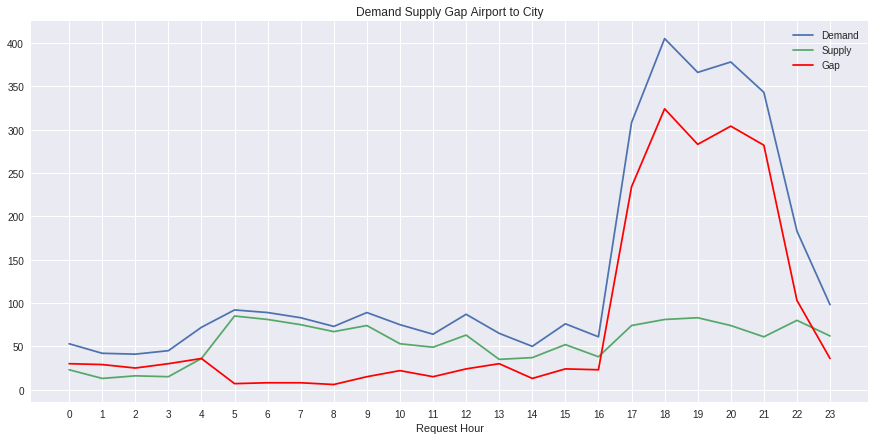

In [0]:
#plot data to show demand supply gap Airport to City
fig, ax = plt.subplots(figsize=(15,7))
plt.xticks([i for i in range(0,24)])
airport.groupby(airport['Request Hour']).count()['Request id'].plot(ax=ax, label='Demand')
airport[airport['Status']=="Trip Completed"].groupby(airport[airport['Status']=="Trip Completed"]['Request Hour']).count()['Request id'].plot(ax=ax, label='Supply')
(airport.groupby(airport['Request Hour']).count()['Request id'] - airport[airport['Status']=="Trip Completed"].groupby(airport[airport['Status']=="Trip Completed"]['Request Hour']).count()['Request id']).plot(ax=ax, label='Gap', c='red')
plt.grid("on")
plt.title("Demand Supply Gap Airport to City")
plt.legend()

## Splitting dataframe into different time slots 

In [0]:
# Early Morning - timeslot 00:00:00 to 3:59:59 city-airport & airport-city
early_morning_city = pd.DataFrame(city[(city['Request Hour']<4)]).reset_index()
early_morning_airport = pd.DataFrame(airport[(airport['Request Hour']<4)]).reset_index()
# Mid Morning - timeslot 04:00:00 to 7:59:59 city-airport & airport-city
mid_morning_city = pd.DataFrame(city[(city['Request Hour']>=4) & (city['Request Hour']<8)]).reset_index()
mid_morning_airport = pd.DataFrame(airport[(airport['Request Hour']>=4) & (airport['Request Hour']<8)]).reset_index()
# Late Morning - timeslot 08:00:00 to 11:59:59 city-airport & airport-city
late_morning_city = pd.DataFrame(city[(city['Request Hour']>=8) & (city['Request Hour']<12)]).reset_index()
late_morning_airport = pd.DataFrame(airport[(airport['Request Hour']>=8) & (airport['Request Hour']<12)]).reset_index()
# Afternoon - timeslot 12:00:00 to 15:59:59 city-airport & airport-city
afternoon_city = pd.DataFrame(city[(city['Request Hour']>=12) & (city['Request Hour']<16)]).reset_index()
afternoon_airport = pd.DataFrame(airport[(airport['Request Hour']>=12) & (airport['Request Hour']<16)]).reset_index()
# Evening - timeslot 16:00:00 to 19:59:59 city-airport & airport-city
evening_city = pd.DataFrame(city[(city['Request Hour']>=16) & (city['Request Hour']<20)]).reset_index()
evening_airport = pd.DataFrame(airport[(airport['Request Hour']>=16) & (airport['Request Hour']<20)]).reset_index()
# Night - timeslot 20:00:00 to 23:59:59 city-airport & airport-city
night_city = pd.DataFrame(city[(city['Request Hour']>=20)]).reset_index()
night_airport = pd.DataFrame(airport[(airport['Request Hour']>=20)]).reset_index()

In [0]:
def get_percentage(dataset):
  percent = dataset.groupby(['Status']).index.count()/len(dataset)*100
  return percent

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Night Airport-City')

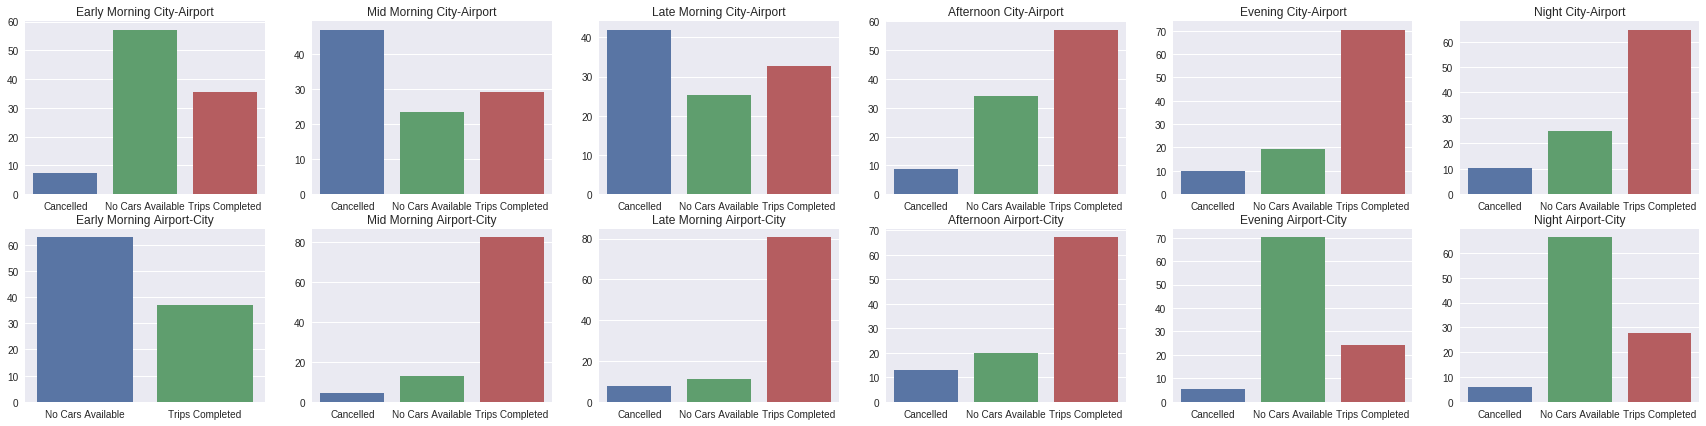

In [0]:
f, axes = plt.subplots(2, 6,figsize=(30, 7))
x = ["Cancelled","No Cars Available","Trips Completed"]
b = ["No Cars Available","Trips Completed"]
sns.barplot(x=x,y=np.array(get_percentage(early_morning_city)), ax = axes[0,0]).set_title('Early Morning City-Airport')
sns.barplot(x=x,y=np.array(get_percentage(mid_morning_city)), ax = axes[0,1]).set_title('Mid Morning City-Airport')
sns.barplot(x=x,y=np.array(get_percentage(late_morning_city)), ax = axes[0,2]).set_title('Late Morning City-Airport')
sns.barplot(x=x,y=np.array(get_percentage(afternoon_city)), ax = axes[0,3]).set_title('Afternoon City-Airport')
sns.barplot(x=x,y=np.array(get_percentage(evening_city)), ax = axes[0,4]).set_title('Evening City-Airport')
sns.barplot(x=x,y=np.array(get_percentage(night_city)), ax = axes[0,5]).set_title('Night City-Airport')
sns.barplot(x=b,y=np.array(get_percentage(early_morning_airport)), ax = axes[1,0]).set_title('Early Morning Airport-City')
sns.barplot(x=x,y=np.array(get_percentage(mid_morning_airport)), ax = axes[1,1]).set_title('Mid Morning Airport-City')
sns.barplot(x=x,y=np.array(get_percentage(late_morning_airport)), ax = axes[1,2]).set_title('Late Morning Airport-City')
sns.barplot(x=x,y=np.array(get_percentage(afternoon_airport)), ax = axes[1,3]).set_title('Afternoon Airport-City')
sns.barplot(x=x,y=np.array(get_percentage(evening_airport)), ax = axes[1,4]).set_title('Evening Airport-City')
sns.barplot(x=x,y=np.array(get_percentage(night_airport)), ax = axes[1,5]).set_title('Night Airport-City')

We can see here that most severe gap in Suppy-demand is in the early morning hours from City to Airport and from Airport to city the gap is severe during the evening and night hours.

## Suggestions
1. Create incentive for the cab drivers to work at high demand hours by increasing rates from City to airport during Early morning hours and from Airport to City during evening and night hours.
2. Start directing cabs from city towards the airport starting late afternoon to increase supply at the high demand hours of evening and night.
3. Direct cabs towards the city from the airport to spuuly high demand at Early morning hours. 
4. Survey the reason behind high percentage of cancellations during Mid morning and late morning hours in the city. Entice users with cheaper fare.